# Импорт библиотек

Стандартные библиотеки

In [1]:
import os
import sys
from tqdm import tqdm

import pandas as pd
import numpy as np
from numpy import array, linspace, radians, degrees, sqrt
import matplotlib.pyplot as plt

Частные библиотеки

In [2]:
from airfoil import Airfoil

In [3]:
Airfoil.help()

Airfoil tutorial
Airfoil.rnd = 4  # количество значащих цифр
Airfoil.vocabulary  # словарь терминов и атрибутов

airfoil = Airfoil(method, discreteness, relative_step, gamma, **attributes)  # создание объекта
где:
discreteness:  int >= 3      # количество дискретных точек
relative_step: int > 0       # относительный шаг
gamma:         float < pi/2  # угол установки профиля

methods:  # методы построения аэродинамического профиля
BMSTU
	description: 
	aliases: ('BMSTU', 'МГТУ', 'МВТУ', 'МИХАЛЬЦЕВ')
	attributes:
		rotation_angle
			description: угол поворота потока
			unit: [рад]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function <lambda> at 0x00000230EE8C2B60>,)
		relative_inlet_radius
			description: относительный радиус входной кромки
			unit: []
			type: (<class 'float'>, <class 'numpy.floating'>)
			assert: (<function <lambda> at 0x00000230EBCE4B80>,)
		relative_outlet_radius
			description: относительный радиус выходной кромки
			unit: []
			typ

# Моделирование профиля 

## BMSTU

In [10]:
airfoil_bmstu = Airfoil('BMSTU', 30, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [11]:
airfoil_bmstu.rotation_angle = radians(70)
airfoil_bmstu.relative_inlet_radius, airfoil_bmstu.relative_outlet_radius = 0.06, 0.03
airfoil_bmstu.inlet_angle, airfoil_bmstu.outlet_angle = radians(20), radians(10)
airfoil_bmstu.x_ray_cross = 0.4
airfoil_bmstu.upper_proximity = 0.5

Определение точек профиля

"__calculate" elapsed 0.0031 seconds
"properties" elapsed 0.6957 seconds


Channel calculation: 100%|██████████| 28/28 [00:00<00:00, 264.15it/s]

"channel" elapsed 0.8047 seconds
"properties" elapsed 0.0 seconds


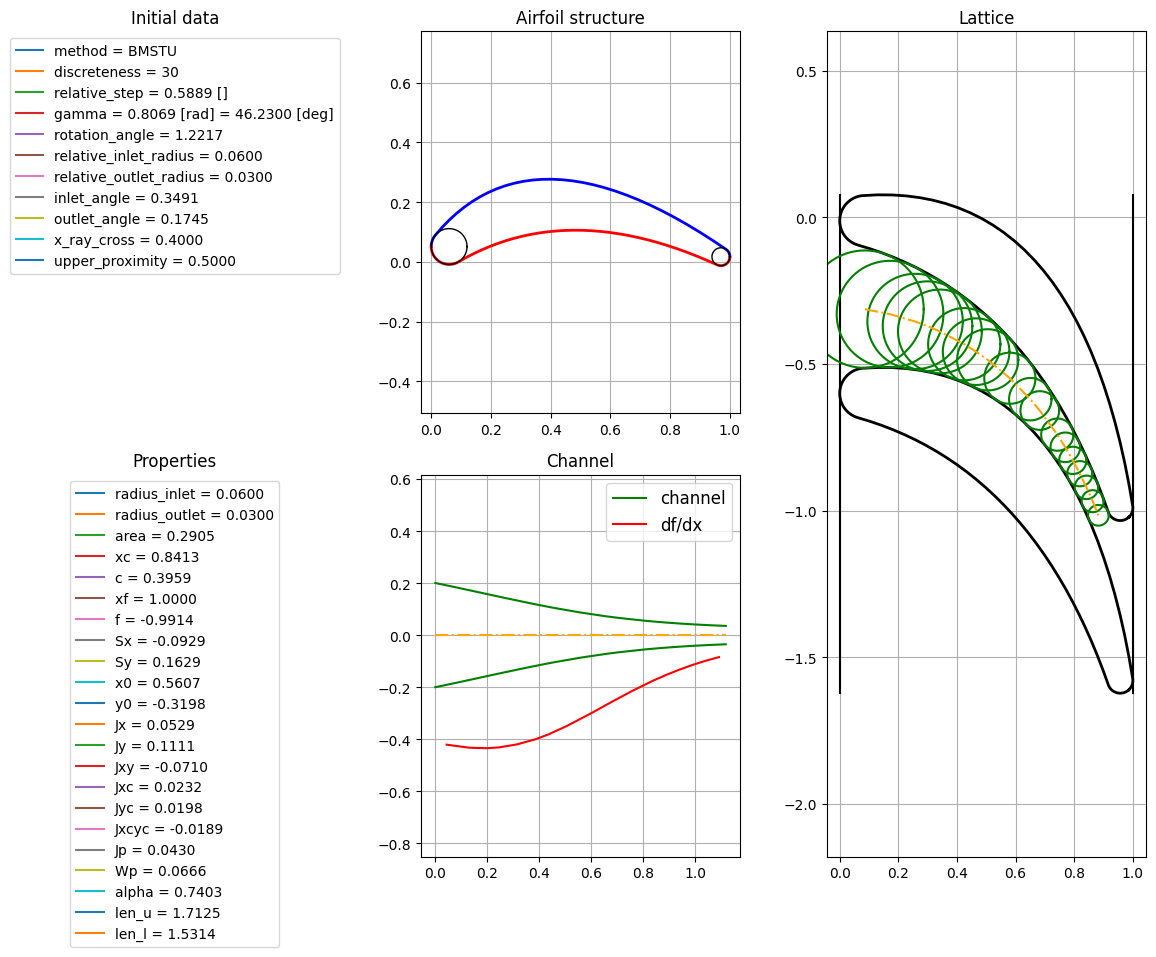

In [12]:
airfoil_bmstu.show()

In [22]:
airfoil_bmstu.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0.06,
 'radius_outlet': 0.03,
 'area': 0.29051386874902874,
 'xc': 0.8412841284128413,
 'c': 0.39587663900959946,
 'xf': 1.0,
 'f': -0.9914468801044789,
 'Sx': -0.09291400852028513,
 'Sy': 0.16290074676477942,
 'x0': 0.5607331156555122,
 'y0': -0.3198264128331593,
 'Jx': 0.05292396198650218,
 'Jy': 0.11113096136445706,
 'Jxy': -0.070997873013844,
 'Jxc': 0.023207607939509784,
 'Jyc': 0.019787118088432698,
 'Jxcyc': -0.018897911528221713,
 'Jp': 0.04299472602794248,
 'Wp': 0.06660363499114186,
 'alpha': 0.7402715177881605,
 'len_u': 1.7125027438580793,
 'len_l': 1.5313554003470644}

CFD: 100%|██████████| 179/179 [00:04<00:00, 39.29it/s]


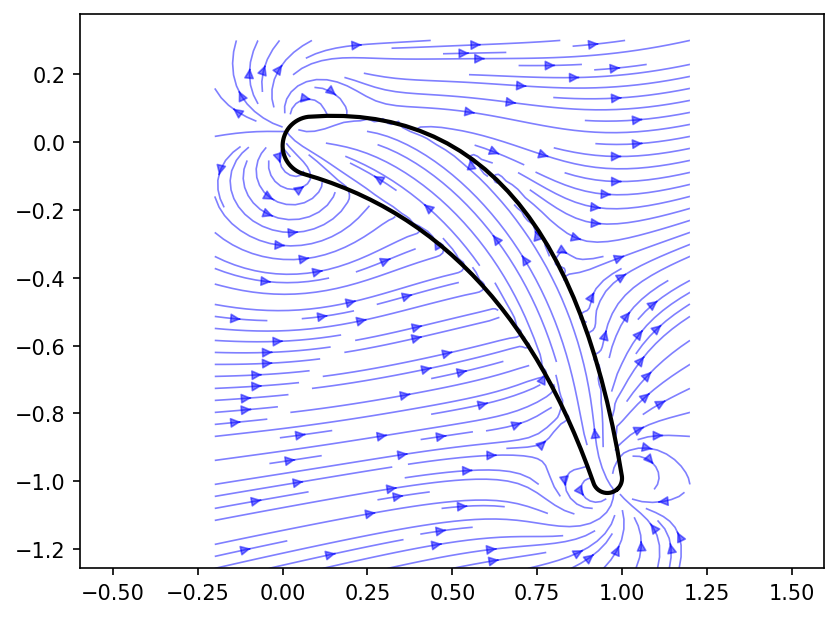

In [27]:
airfoil_bmstu.cfd(10, 5)

## NACA

In [13]:
airfoil_naca = Airfoil('NACA', 40, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [14]:
airfoil_naca.relative_thickness = 0.2
airfoil_naca.x_relative_camber = 0.3
airfoil_naca.relative_camber = 0.05
airfoil_naca.closed = True

"__calculate" elapsed 0.002 seconds
"properties" elapsed 0.53 seconds


Channel calculation: 100%|██████████| 36/36 [00:00<00:00, 295.08it/s]

"channel" elapsed 0.6553 seconds
"properties" elapsed 0.0 seconds


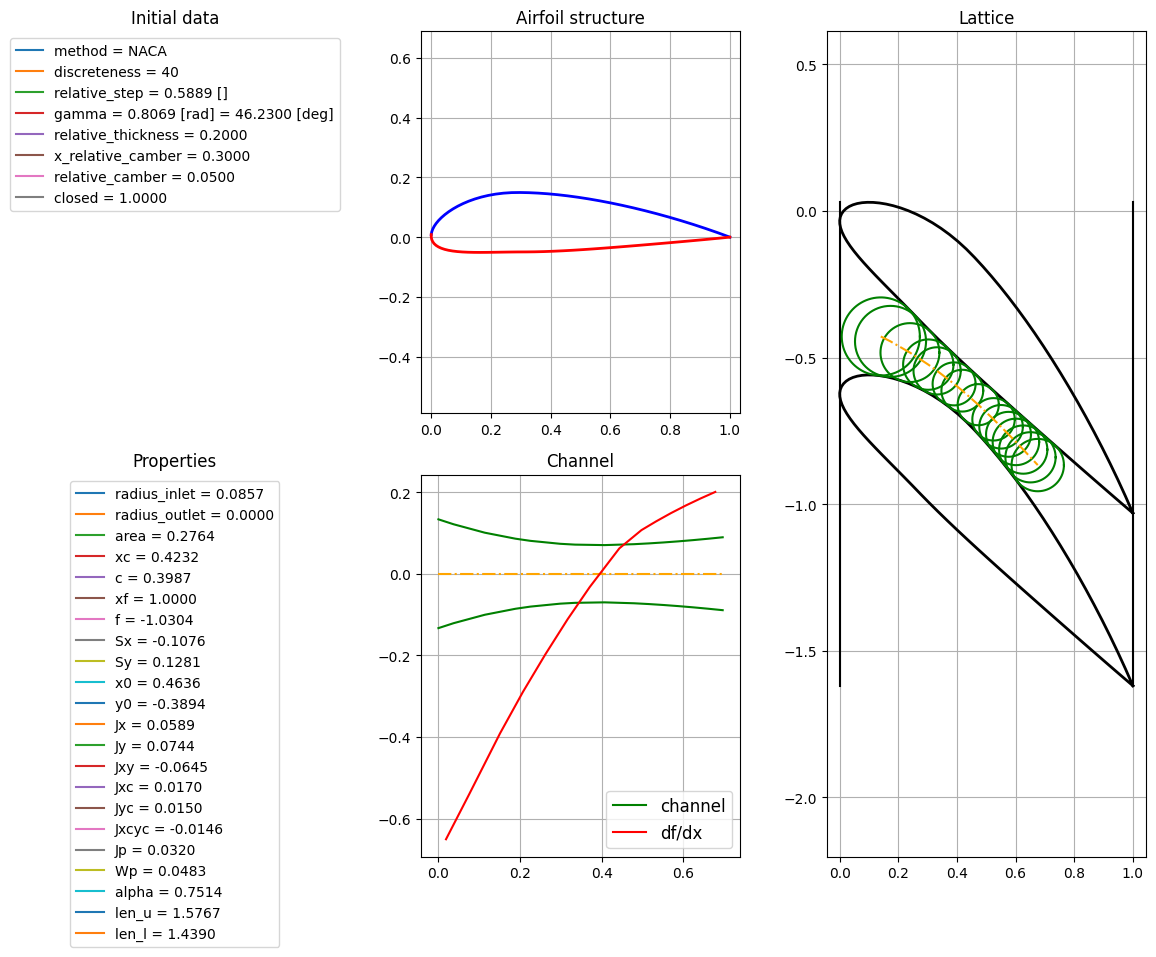

In [15]:
airfoil_naca.show()

In [28]:
airfoil_naca.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0.08569925164000373,
 'radius_outlet': 0,
 'area': 0.27635234117268553,
 'xc': 0.42324232423242325,
 'c': 0.3986917398638531,
 'xf': 1.0,
 'f': -1.0303733199950589,
 'Sx': -0.10761095230819542,
 'Sy': 0.12811444919347065,
 'x0': 0.4635909674216047,
 'y0': -0.38939765030234386,
 'Jx': 0.058902373446129294,
 'Jy': 0.07440026303103309,
 'Jxy': -0.06450376816299808,
 'Jxc': 0.016998921470520408,
 'Jyc': 0.015007561588746006,
 'Jxcyc': -0.014616302677281597,
 'Jp': 0.03200648305926641,
 'Wp': 0.048286434444470575,
 'alpha': 0.7513901079023984,
 'len_u': 1.5766958039720214,
 'len_l': 1.438975862369137}

CFD: 100%|██████████| 79/79 [00:06<00:00, 12.13it/s]


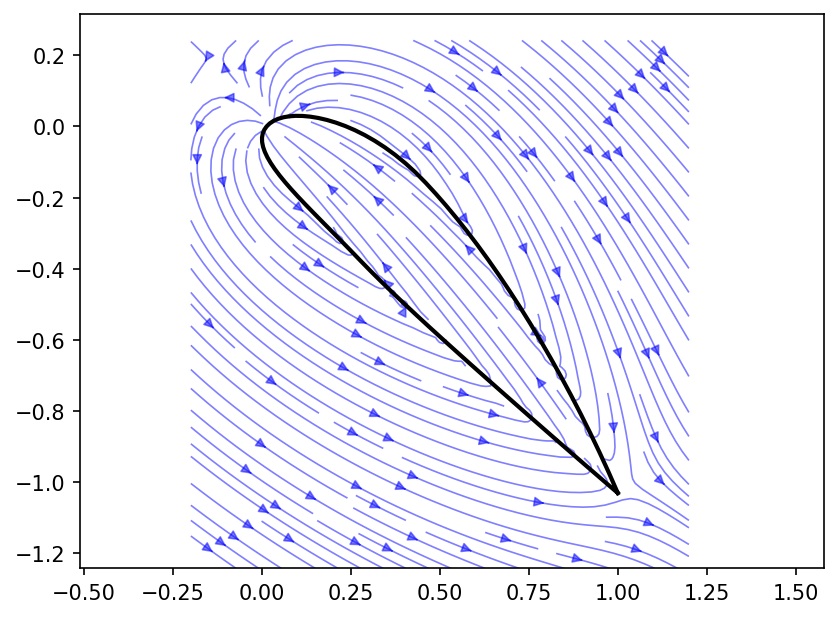

In [30]:
airfoil_naca.cfd(10,-8)

## MYNK

In [16]:
airfoil_mynk = Airfoil('MYNK', 20, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [17]:
airfoil_mynk.mynk_coefficient = 0.2

"__calculate" elapsed 0.0015 seconds
"properties" elapsed 0.6093 seconds


Channel calculation: 100%|██████████| 21/21 [00:00<00:00, 276.32it/s]

"channel" elapsed 0.6898 seconds
"properties" elapsed 0.0 seconds


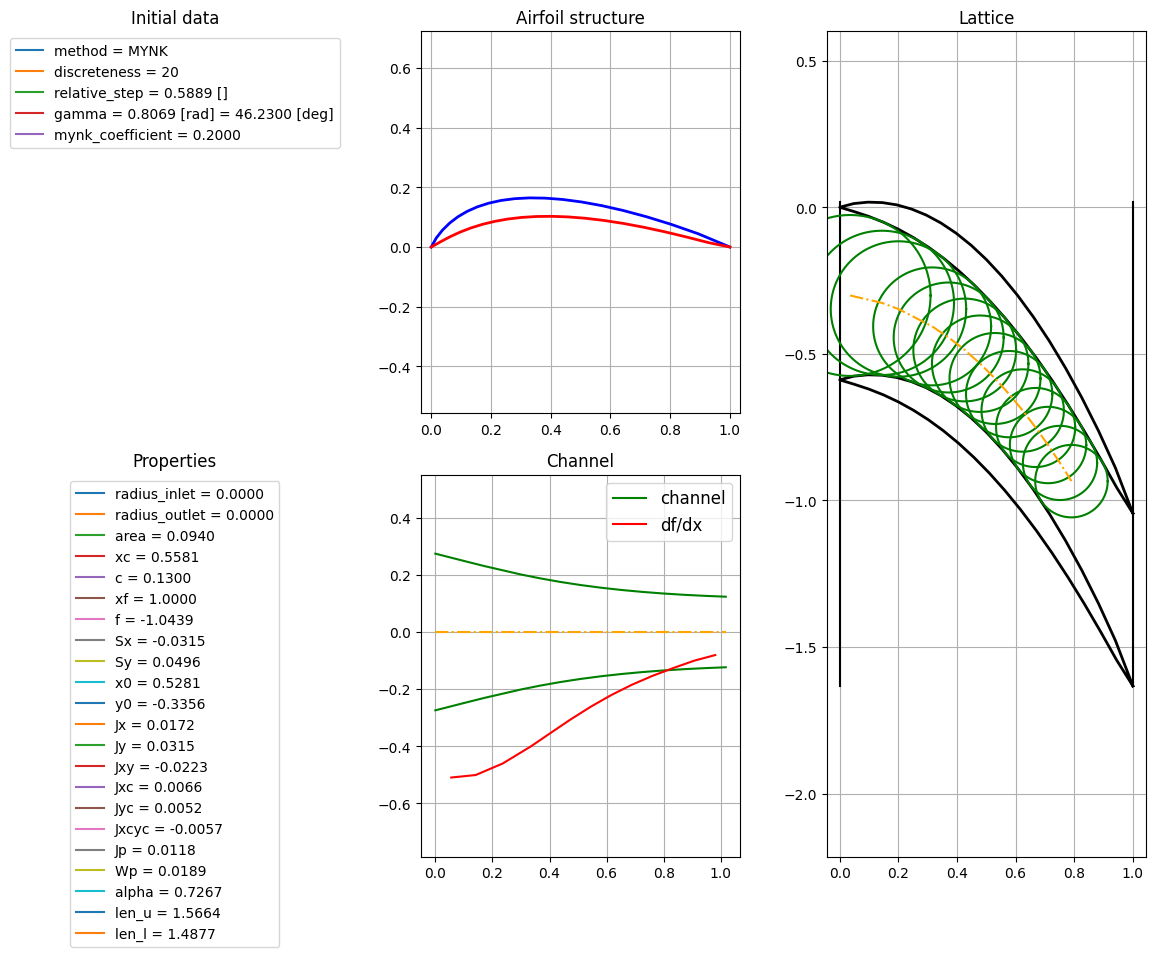

In [18]:
airfoil_mynk.show()

In [29]:
airfoil_mynk.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0,
 'radius_outlet': 0,
 'area': 0.09396776491278673,
 'xc': 0.5580558055805581,
 'c': 0.13004347400191874,
 'xf': 1.0,
 'f': -1.043883921460576,
 'Sx': -0.03153184882551968,
 'Sy': 0.04962244305721887,
 'x0': 0.5280794228028559,
 'y0': -0.33556027276784745,
 'Jx': 0.017160407126348316,
 'Jy': 0.031450855582253794,
 'Jxy': -0.022303424059805614,
 'Jxc': 0.006579571333582402,
 'Jyc': 0.005246264494530067,
 'Jxcyc': -0.005652103532118272,
 'Jp': 0.011825835828112469,
 'Wp': 0.018900939588121234,
 'alpha': 0.7266954573853913,
 'len_u': 1.5664389226189268,
 'len_l': 1.487745328488906}

CFD: 100%|██████████| 39/39 [00:00<00:00, 217.87it/s]


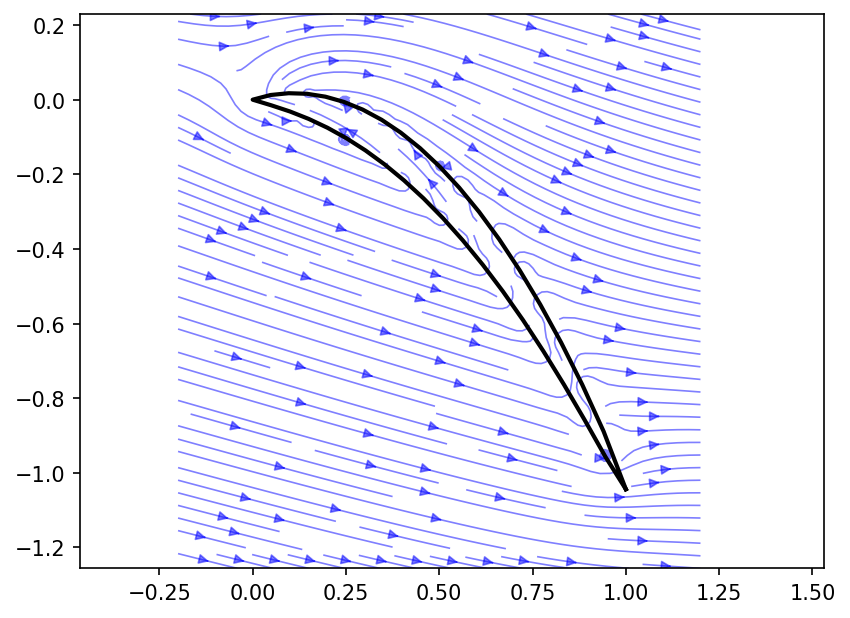

In [33]:
airfoil_mynk.cfd(10, -2)

## PARSEC

In [19]:
airfoil_parsec = Airfoil('PARSEC', 50, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [20]:
airfoil_parsec.relative_inlet_radius = 0.06
airfoil_parsec.x_relative_camber_upper, airfoil_parsec.x_relative_camber_lower = 0.35, 0.45
airfoil_parsec.relative_camber_upper, airfoil_parsec.relative_camber_lower = 0.055, -0.006
airfoil_parsec.d2y_dx2_upper, airfoil_parsec.d2y_dx2_lower = -0.35, -0.2
airfoil_parsec.theta_outlet_upper, airfoil_parsec.theta_outlet_lower = radians(-6), radians(0.05)

"__calculate" elapsed 0.0022 seconds
"properties" elapsed 0.5228 seconds


Channel calculation: 100%|██████████| 52/52 [00:00<00:00, 282.61it/s]


"channel" elapsed 0.7102 seconds
"properties" elapsed 0.0 seconds


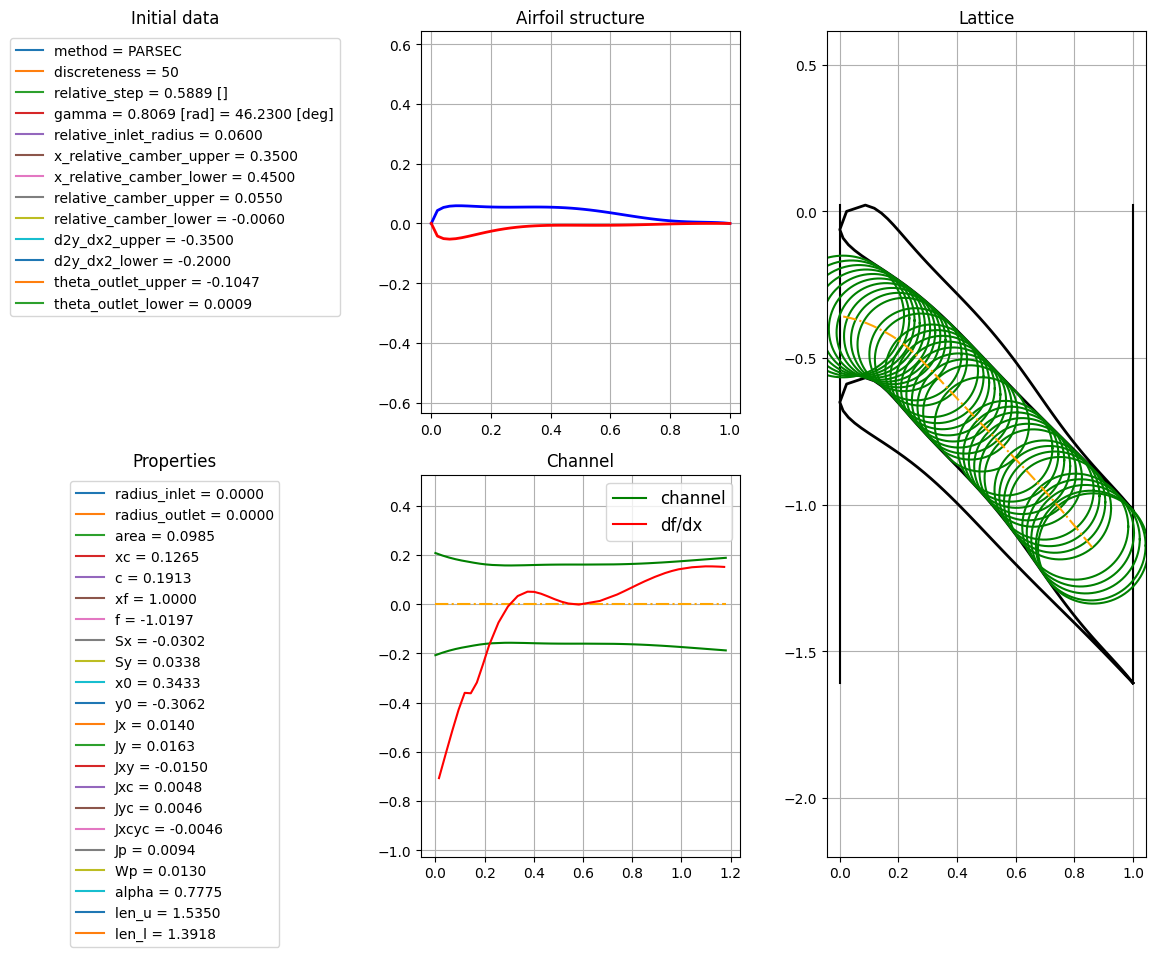

In [21]:
airfoil_parsec.show()

In [34]:
airfoil_parsec.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0,
 'radius_outlet': 0,
 'area': 0.09846727427897439,
 'xc': 0.1265126512651265,
 'c': 0.19133259229501695,
 'xf': 1.0,
 'f': -1.0196905265026146,
 'Sx': -0.030152832543065528,
 'Sy': 0.0338055695058471,
 'x0': 0.34331781552183743,
 'y0': -0.3062218667456709,
 'Jx': 0.01402791595445197,
 'Jy': 0.016255355690834965,
 'Jxy': -0.014968390122687653,
 'Jxc': 0.00479445928544483,
 'Jyc': 0.004649301415615897,
 'Jxcyc': -0.004616385522206626,
 'Jp': 0.009443760701060728,
 'Wp': 0.013033586771766649,
 'alpha': 0.7775377978169954,
 'len_u': 1.5350482500464164,
 'len_l': 1.3917546178683613}

CFD: 100%|██████████| 99/99 [00:20<00:00,  4.93it/s]


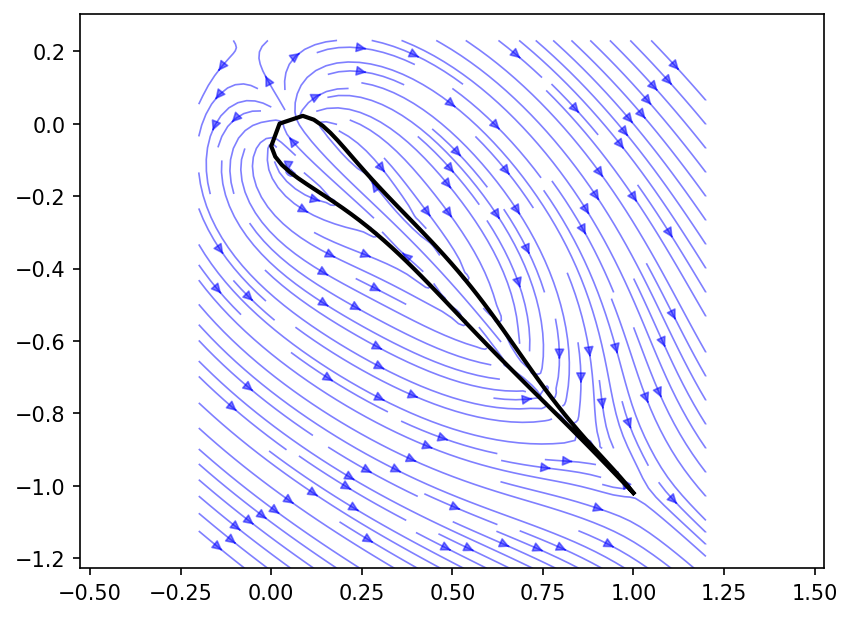

In [35]:
airfoil_parsec.cfd(5, -5)

## BEZIER

In [36]:
airfoil_bezier = Airfoil('BEZIER', 30, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [37]:
airfoil_bezier.points = ((1.0, 0.0), (0.35, 0.200), (0.05, 0.100), (0.0, 0.0), (0.05, -0.10), (0.35, -0.05), (0.5, 0.0), (1.0, 0.0))

"__calculate" elapsed 0.0012 seconds
"properties" elapsed 0.5353 seconds


Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 264.46it/s]

"channel" elapsed 0.6581 seconds
"properties" elapsed 0.0 seconds


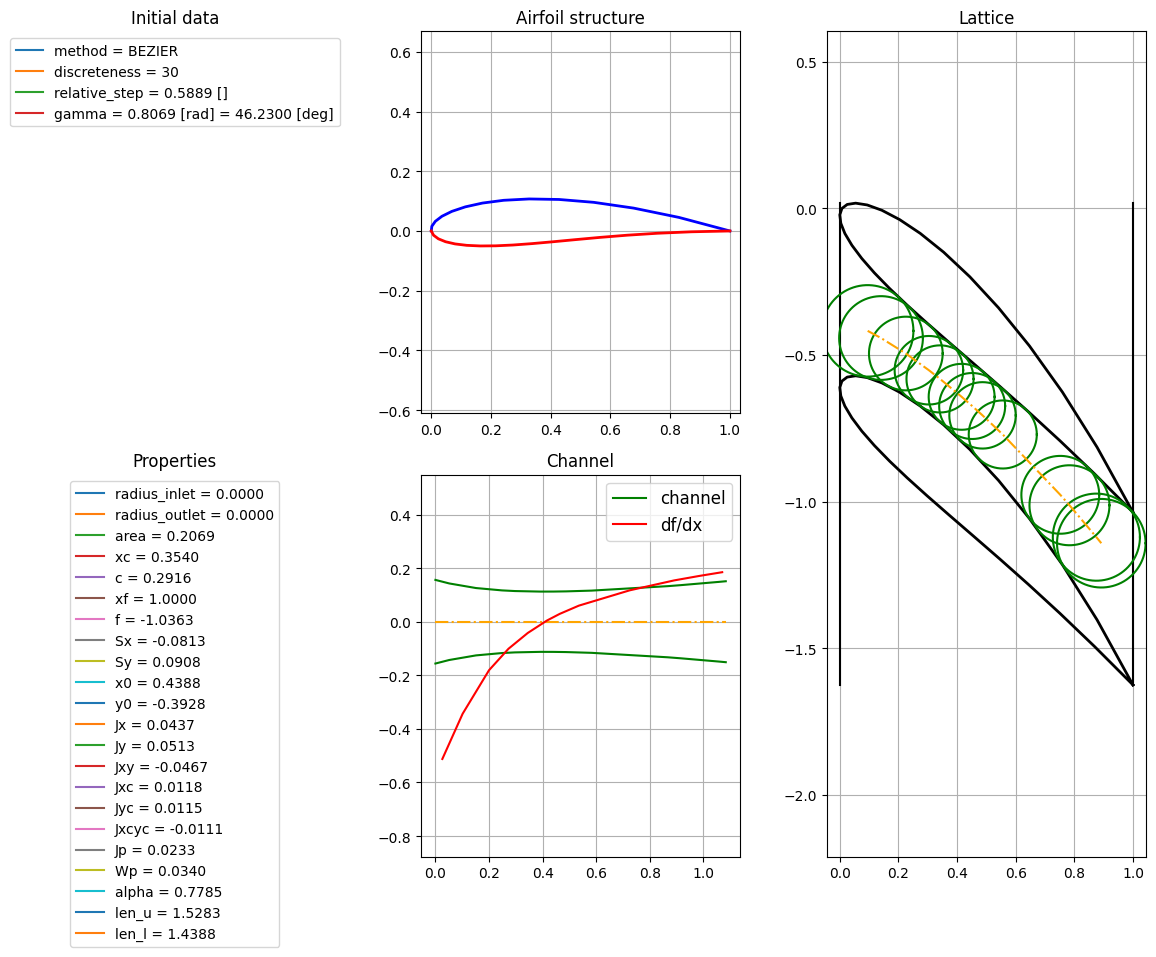

In [38]:
airfoil_bezier.show()

CFD: 100%|██████████| 30/30 [00:00<00:00, 41.78it/s]


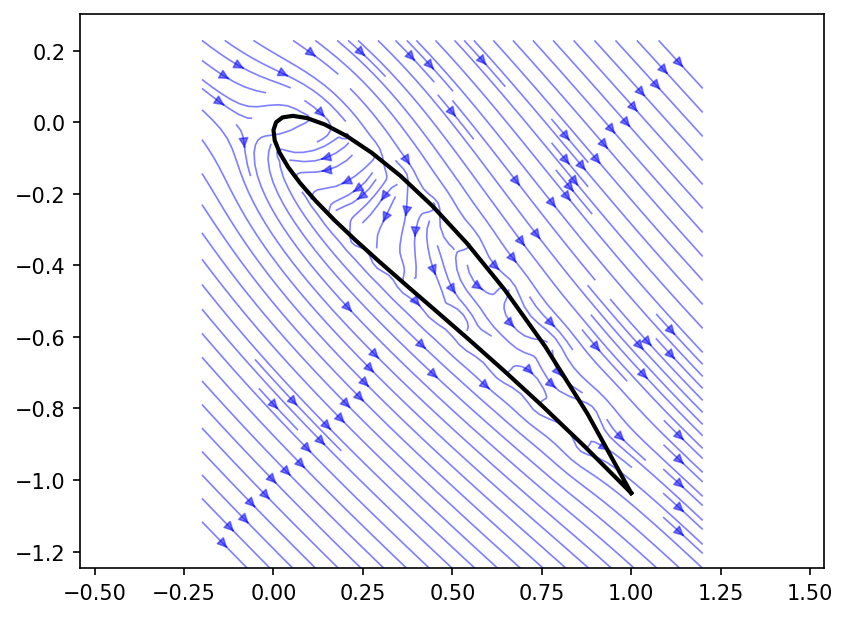

In [39]:
airfoil_bezier.cfd(20, -20)

## MANUAL

In [40]:
airfoil_manual = Airfoil('MANUAL', 30, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [41]:
airfoil_manual.upper = ((0.0, 0.0), (0.05, 0.08), (0.10, 0.110), (0.35, 0.150), (0.5, 0.15), (1.0, 0.0))
airfoil_manual.lower = ((0.0, 0.0), (0.05, -0.025), (0.35, -0.025), (0.5, 0.0), (0.8, 0.025), (1.0, 0.0))
airfoil_manual.deg = 3

"__calculate" elapsed 0.0017 seconds
"properties" elapsed 0.5773 seconds


Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 316.81it/s]

"channel" elapsed 0.6813 seconds
"properties" elapsed 0.0 seconds


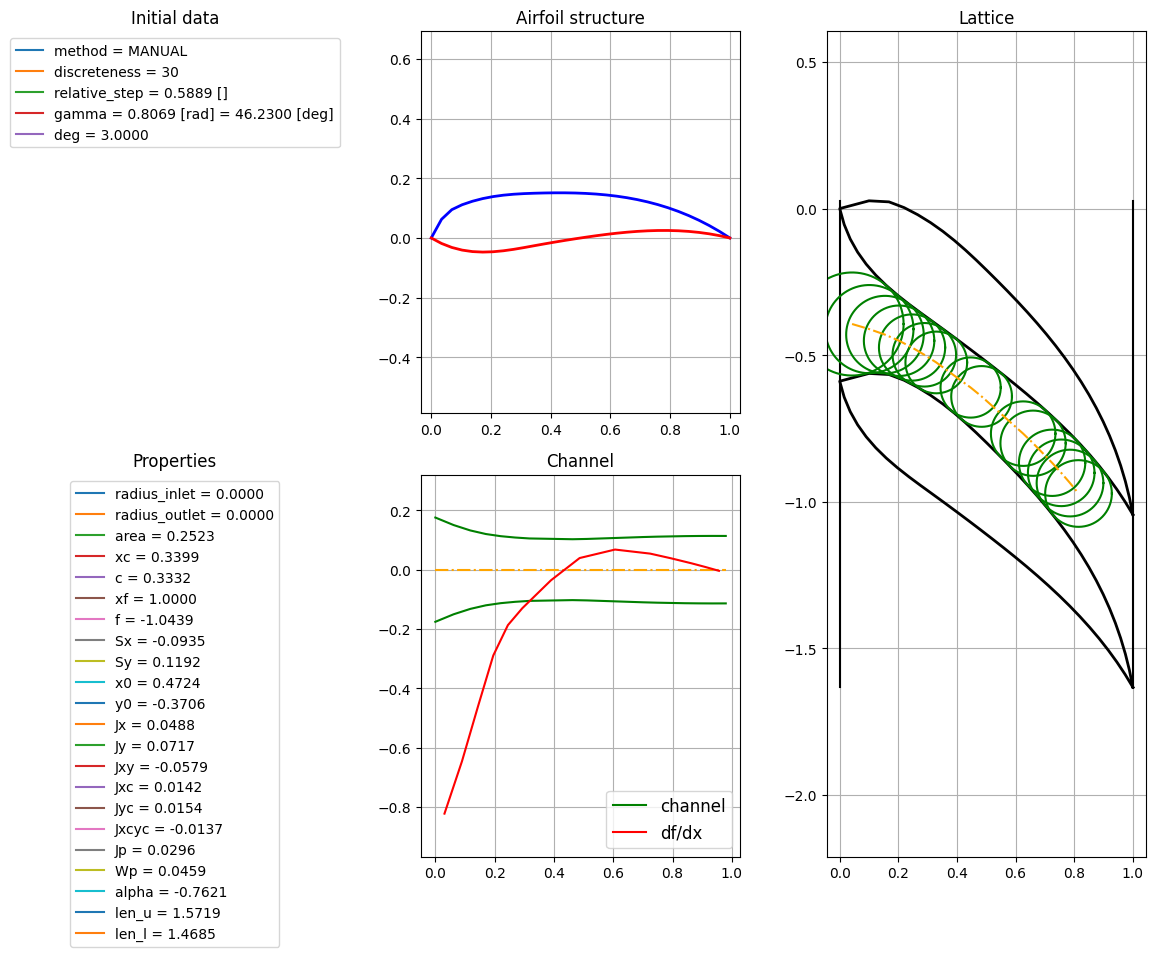

In [42]:
airfoil_manual.show()

In [43]:
airfoil_manual.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0,
 'radius_outlet': 0,
 'area': 0.2523171282616151,
 'xc': 0.33993399339933994,
 'c': 0.3332092805793409,
 'xf': 1.0,
 'f': -1.043883921460576,
 'Sx': -0.093518246028744,
 'Sy': 0.1191859651255799,
 'x0': 0.4723657325475022,
 'y0': -0.37063772353884583,
 'Jx': 0.04882750140657534,
 'Jy': 0.07174230856339739,
 'Jxy': -0.057883266631473446,
 'Jxc': 0.014166111589135943,
 'Jyc': 0.015442942837471794,
 'Jxcyc': -0.01370845183954824,
 'Jp': 0.029609054426607738,
 'Wp': 0.045919572581535555,
 'alpha': -0.7621295008225728,
 'len_u': 1.5719252075271022,
 'len_l': 1.4684590883908577}

CFD: 100%|██████████| 59/59 [00:01<00:00, 42.03it/s]


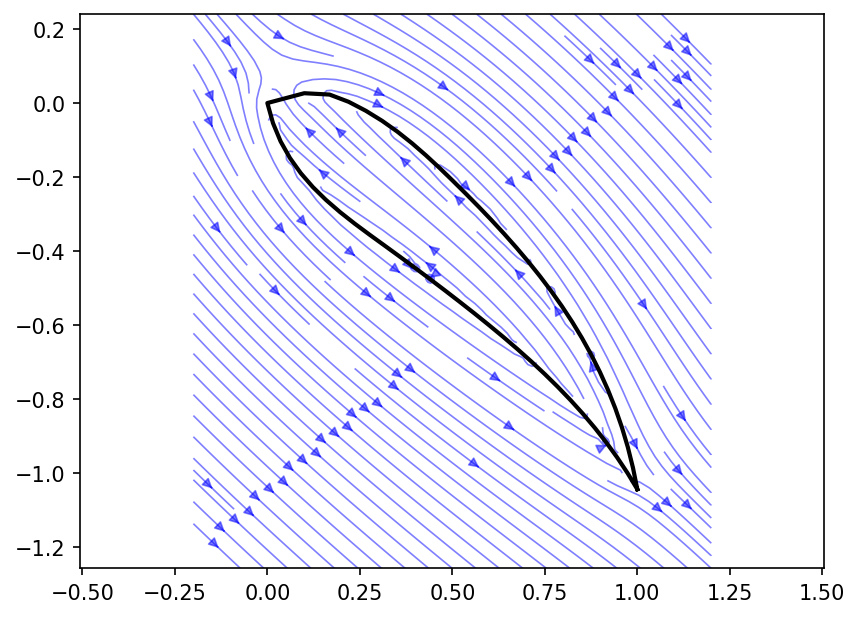

In [45]:
airfoil_manual.cfd(20, -20)

# CIRCLE (airfoil)

# CIRCLE (channel)